<a href="https://colab.research.google.com/github/Aksharawalia1111/Ps_Project/blob/main/Ps_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image = cv2.imread('/content/dog.png')

In [ ]:
type(image)

numpy.ndarray

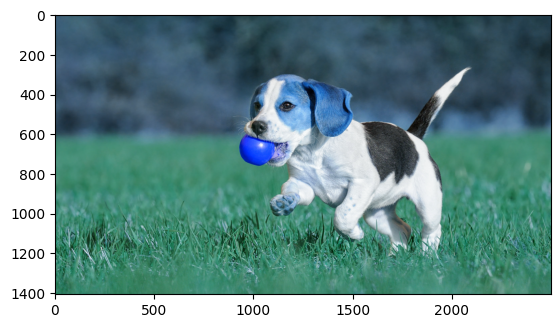

In [ ]:
plt.imshow(image)

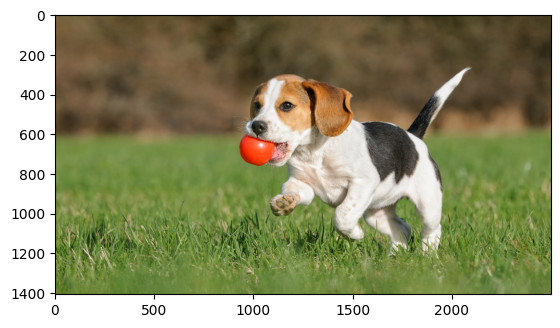

In [ ]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

In [ ]:
"""
1.SPLITTING image channels
"""
r,g,b = cv2.split(new_image)
# print('r',r.shape)
# print('g',g.shape)
# print('b',b.shape)

new_image = cv2.merge((r,g,b))

In [ ]:
#resize
s = 10
w = int(new_image.shape[1]*s/100)
h = int(new_image.shape[0]*s/100)
dim = (w,h)
re_size = cv2.resize(new_image,dim,interpolation=cv2.INTER_AREA)
re_size.shape

(140, 250, 3)

In [ ]:
"""
rotate image
"""
(h,w) = new_image.shape[:2]
c = (w/2 , h/2)

angle = 90

m = cv2.getRotationMatrix2D(c, angle,1.0)
rotate_90 = cv2.warpAffine(new_image,m,(h,w))

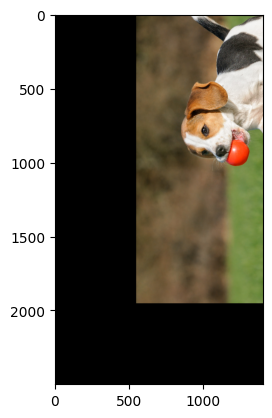

In [ ]:
plt.imshow(rotate_90)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
yolo = cv2.dnn.readNet('/content/yolov3-tiny.weights', '/content/yolov3-tiny.cfg')

In [ ]:
with open('/content/coco.names', 'r') as f:
    classes = f.read().strip().split("\n")

In [ ]:
img = cv2.imread('/content/dog.png')

height, width, _ = img.shape

In [ ]:
blob = cv2.dnn.blobFromImage(img, 1/255, (320, 320), (0, 0, 0), swapRB=True, crop=False)
yolo.setInput(blob)

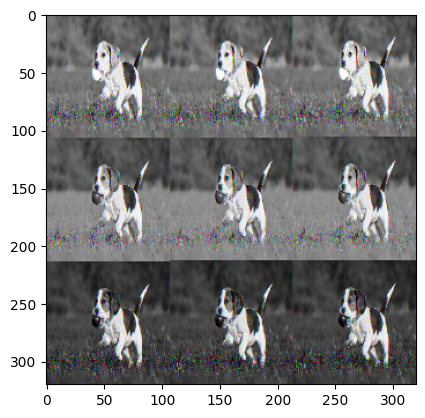

In [ ]:
i = blob.reshape(320,320,3)
plt.imshow(i)

In [ ]:
output_layers_name = yolo.getUnconnectedOutLayersNames()
layer_outputs = yolo.forward(output_layers_name)

In [ ]:
# Initialize lists
boxes = []
confidences = []
class_ids = []

# Loop through detections
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.7:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
len(boxes)

0

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))

In [ ]:
if len(indexes) > 0:
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
        color = colors[class_ids[i]]

        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

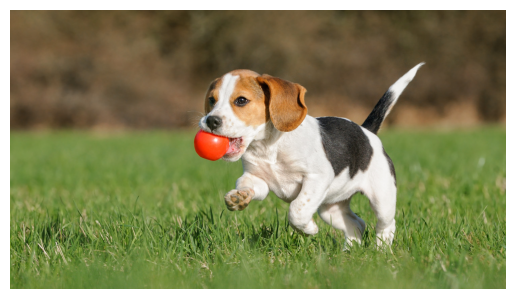

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

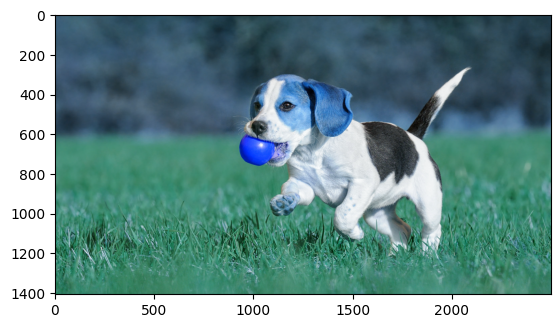

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imwrite("./img.jpg",img)

True